# SMOTE (snthetic minority oversampling technique)
is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [7]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_classification

In [9]:
x,y = make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                         weights=[0.90],random_state=12)

In [10]:
x

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [13]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])

In [15]:
df2.value_counts()

target
0         900
1         100
Name: count, dtype: int64

In [19]:
final_df = pd.concat([df1,df2], axis=1)   # axis important...
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [20]:
import matplotlib.pyplot as plt

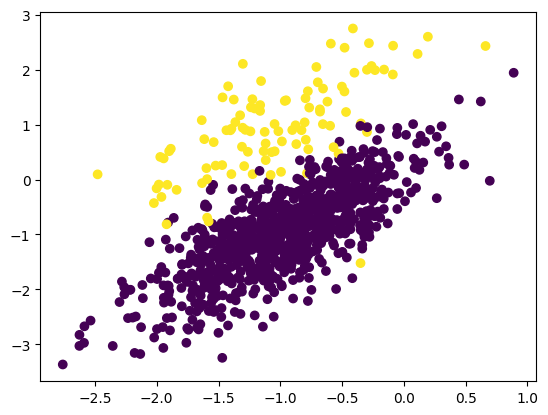

In [23]:
plt.scatter(final_df['f1'],final_df['f2'], c=final_df['target'])

In [27]:
!pip install imblearn

In [26]:
from imblearn.over_sampling import SMOTE

In [28]:
oversample = SMOTE()

In [29]:
oversample

C:\Users\Mayur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


SMOTE()

In [30]:
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

C:\Users\Mayur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\Mayur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [33]:
x.shape

(1800, 2)

In [34]:
y.shape

(1800,)

In [35]:
len(y[y==1])

900

In [36]:
len(y[y==0])

900

In [37]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

In [38]:
oversample_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


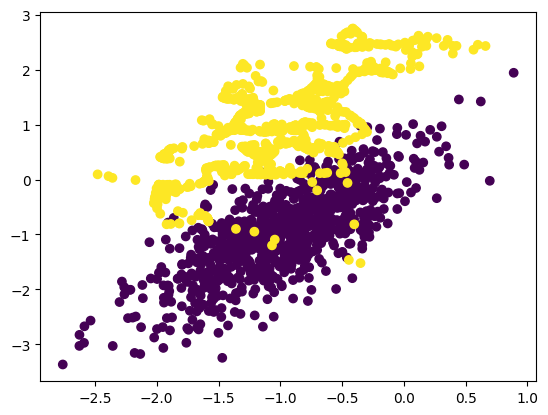

In [40]:
plt.scatter(oversample_df['f1'],oversample_df['f2'], c=oversample_df['target'])